In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#import data - my data is stored in a github repo, i click the csv file and click view raw and use that url.
housing = pd.read_csv('https://raw.githubusercontent.com/bharathkreddy/Linear-Regression/master/housing.csv')

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# OUR CHECKLIST

<ol>
<li> Formulate Problem Statement</li>
    <ul>
    <li> Look at the big picture </li> 
    <li>Get the data and translate your problem statement to a precise statement using features in dataset.</li> 
    </ul><br>
<li> Discover and visualize data to gain insights aka EDA (Exploratory Data Analysis)</li>
    <ul>
    <li> shape and size of dataset</li> 
    <li>Univariate analysis</li> 
    <li>bivariate analysis</li>     
    </ul><br>
<li>Prepare the data for ML algorithms</li>
    <ul><li>test-train split</li>
    <li>Missing value Treatment</li>
        <li>Handling Text and Categorical Attributes</li>    
    <li>Outlier Treatment</li>
    <li>Data processsing (scaling, transformation etc)</li></ul><br>
<li>Select a model and train it</li><br>
<li>Fine-tune your model</li><br>
<li>Present Solution</li>
</ol>

## Step1  
### Problem Statement : 
***
Predict the median_house_value by using features given in housing dataset
***

## Step2 EDA    
### a. shape and size of data: 
***
20640 rows with 10 features.  
Predicted/Dependent varaiable : median_house_value   
Predictors/Independent variables/ features : longitude, latitude, housing_median_age, total_rooms,total_bedrooms,
       population, households, median_income, ocean_proximity  
All features are numerical with only Ocean_proximity having 5 categories  
***

In [10]:
# the dataset has 20,640 rows and 10 columns
housing.shape 

(20640, 10)

In [6]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [11]:
# all the dat is numerical except 'ocean_proximity' which we see is categorical
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
# lets explore ocean_proximity more
# there are 5 categories with one of these categories with only 5 rows of data 
# - should we merge that with any existing category ?
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## Step2 EDA    
### b. Univariate Analysis: 
***
In this step we look at one feature at a time. We primarily check these
1. Data Distribution - how is the data spread
2. Caps or missing values (at this step we only check, we dont fix.)
3. Outlier check ( again we only check, we fix in step 3 )
***

In [4]:
# Lets look at other fileds
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


***
1. Null values are ignored so you see the count in total_bedrooms is 20433 and not 20640. 
2. Get a feel of data by mentally visualizing the data spreads using the 25th 50th 75th percentiles

***

Another quick way to get intution around data is to create plot it

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A1F4B2488>,
      dtype=object)

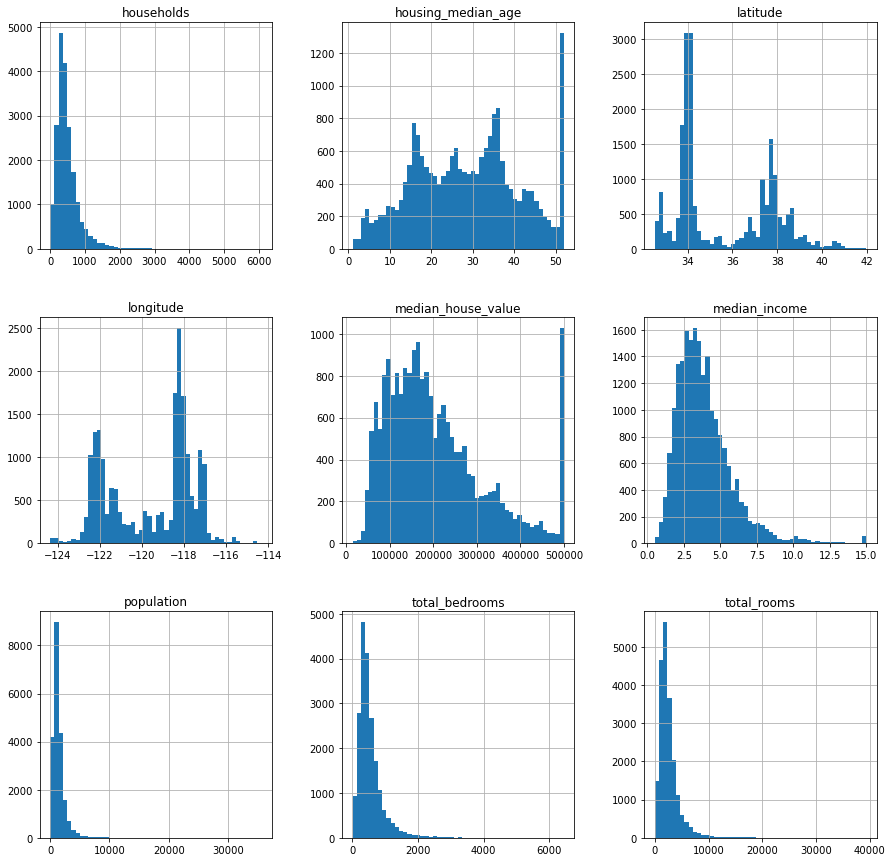

In [17]:
housing.hist(bins=50,figsize=(15,15))

Observations:
1. Median_Income does not look like its in USD (look at numbers on x axis)
2. Values for Housing_Median_age and median_housing_value looks capped. 
3. All features have different scales.
4. Many histograms are 'tail heavy'

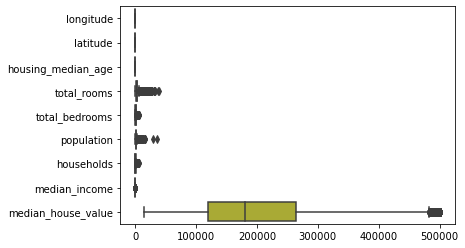

In [9]:
sns.boxplot(data=housing[:-1],orient='h')

***
This does not look informative as median_housing_value has large values compared to any other feature thereby dwarfing all other features. Lets plot all features one by one or write a loop - this is more programming approach where anything that looks duplicate is written as a loop - make this a habbit!!
***

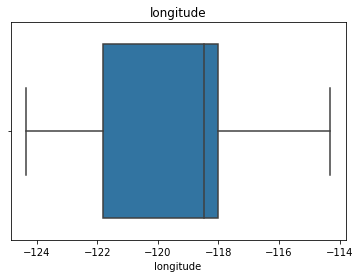

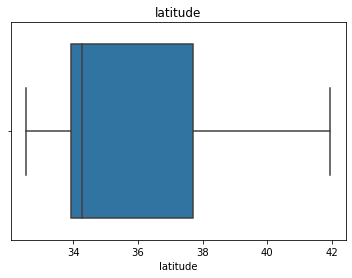

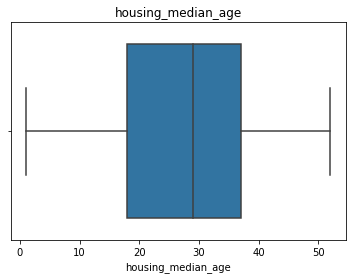

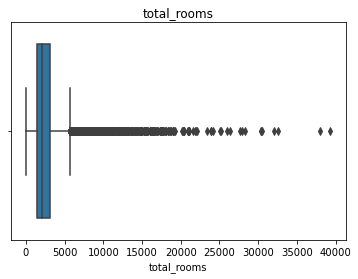

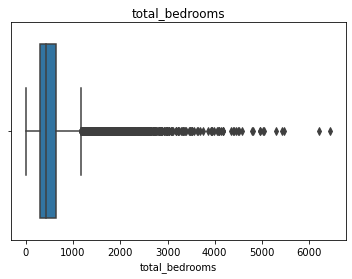

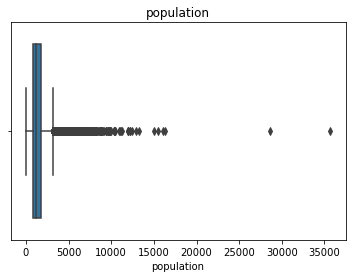

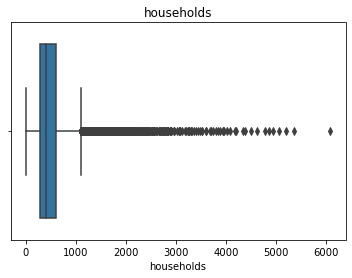

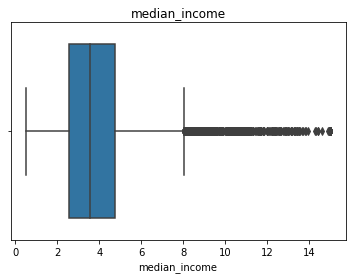

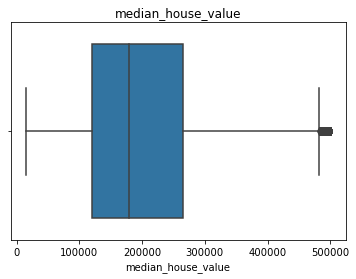

In [26]:
for x in range(0,len(housing.columns)-1): #loop over all columns except the last one since its categorical. 
    plt.figure()                        # each plot is a figure and hence need to create figure
    sns.boxplot(housing.iloc[:,x])      # extract the relavent column and put a box plot for it.
    plt.title(housing.columns[x])       # extract the column name and use it as plot title.

There are quite a few columns with outliers, we first do our analsis without making any changes in data and then again do same analysis with outliers removed.

## Step2 EDA    
### c. Bivariate Analysis: 
***
In this step we look at one feature at a time. We primarily check these  
1. Impact of one variable on other.
2. Correlation between variables.
***

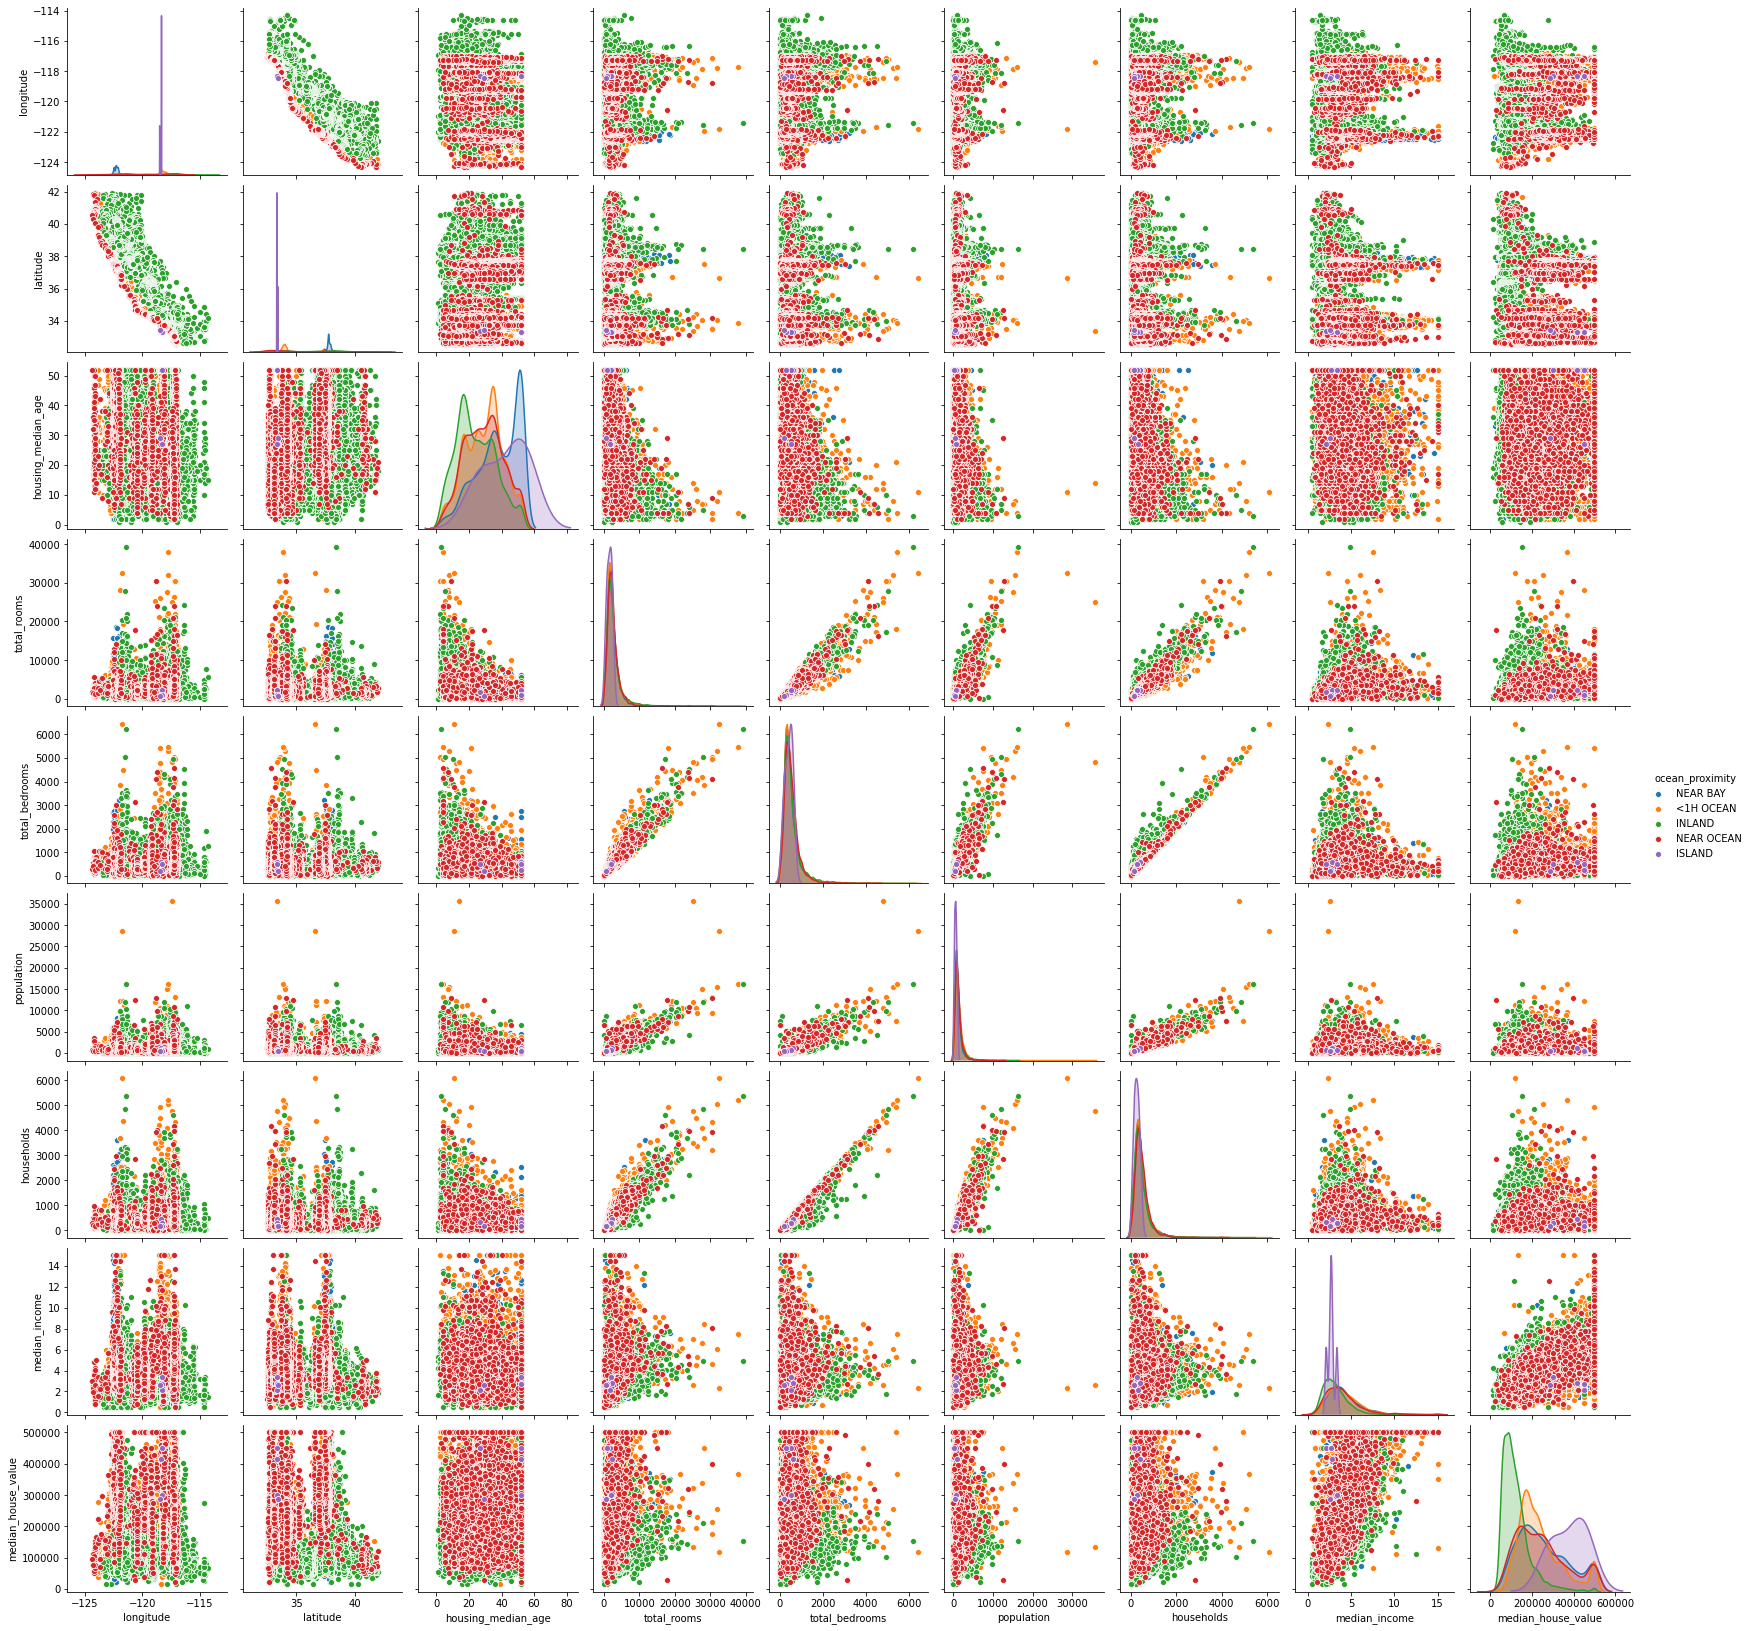

In [28]:
sns.pairplot(housing[:-1],hue='ocean_proximity')

There are quite a few variable which are very strongly corelated with each other. Make a mental note of these pairs. Also see the distribution of each pair and see if you can find any paculiar patterns.  
Your ability to spot patterns in these type of datasets would make you very good with data

Since there is geographical information (latitude and longitude), it is a good idea to create a scatterplot of all districts to visualize the data 

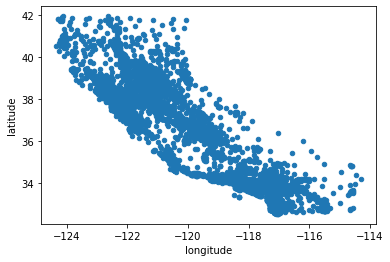

In [82]:
housing.plot(kind="scatter", x="longitude", y="latitude")

This looks like California all right, but other than that it is hard to see any particular pattern. Setting the alpha option to 0.1 makes it much easier to visualize the places where there is a high density of data points 

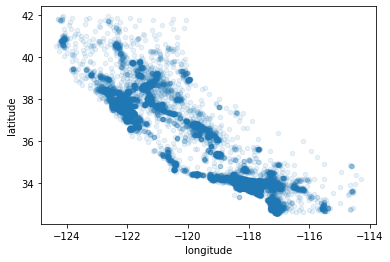

In [83]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

Now you have a much better view of which areas in california have high density. More importantly our brains are much better to understand data visually than in tabular form

Now lets add some more details to above graph, lets impliment size of each dot as district's population, color as price. I also chose a color map (cmap) to jet, this is a color schema with gradiant from blue to red. You can see how to do that by looking at documentation for .plot by pressing Alt+tab after opening the bracket after .plot(

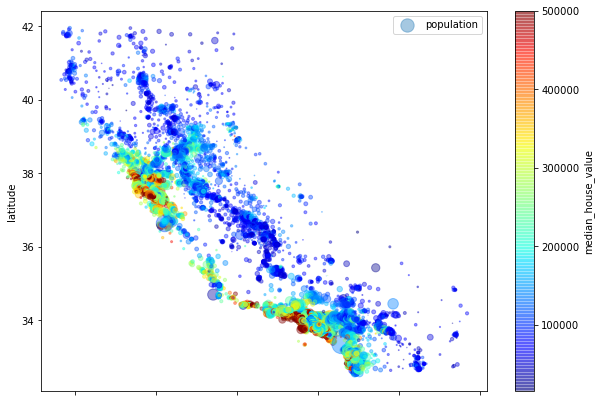

In [84]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

This tells housing prices depends on proximity to coast line - see all the reddish bubbles. It also depends on population density (see the size of bubbles)

In [87]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


I just want to see what is correlated to Housing prices so i subset only that column. I also want them to apprear in ascending order.  <br><br>
Dont worry about memorizing formulae - i allways do things in steps. Here i first googled how to subset a dataframe, then how to sort values and kept building the formulae.

In [90]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up. When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small negative correlation between the latitude and the median house value (i.e., prices have a slight tendency to go down when you go north). Finally, coefficients close to zero mean that there is no linear correlation. <br><br>
The most promising attribute to predict the median house value is the median
income, so let’s zoom in on their correlation scatterplot 

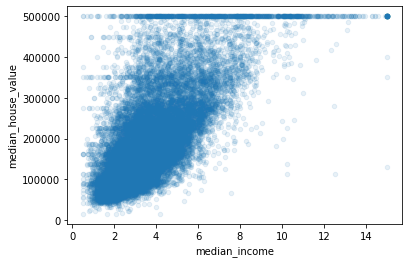

In [91]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

This plot reveals a few things. 
1. The correlation is indeed very strong; you can clearly see the upward trend and the points are not too dispersed. 
2. The price cap that we noticed earlier is clearly visible as a horizontal line at 500,000. But this plot reveals other less obvious straight lines:
    a. Horizontal line around 450,000
    b. Another around 350,000, 
    c. perhaps one around 280,000, and a few more below that.

You may want to try removing the corresponding districts to prevent your algorithms from learning to reproduce these data quirks. Remember how overfitting means modelling the noise as well ?

## STEP 3 : Prepare the data for ML algorithms
### Part a: Test Train split
It may sound strange to voluntarily set aside part of the data at this stage. This is to prevent something called a dataleakage.  your brain is an amazing pattern detection system, which means that it is highly prone to overfitting: if you look at the test set, you may stumble upon some seemingly interesting pattern in the test data that leads you to select a particular kind of Machine Learning model. When you estimate the generalization error using the test set, your estimate will be too optimistic and you will launch a system that will not
perform as well as expected.<br> <br>
Creating a test set is theoretically quite simple: just pick some instances randomly,typically 20% of the dataset (or less if your dataset is very large), and set them aside:

In [92]:
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data)) #generate random seq of numbers of lenght matching no of rows in data
    test_set_size = int(len(data) * test_ratio)  # Arriving at size of test set
    test_indices = shuffled_indices[:test_set_size] 
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [93]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set))
print(len(test_set))

16512
4128


Without the line  np.random.seed(42) the code would still work, but it will not be perfect: if you run the program again, it will generate a different test set! Over time, you (or your Machine Learning algorithms) will get to see the whole dataset, which is what you want to avoid.  <br><br>
One solution is to save the test set on the first run and then load it in  subsequent runs. Another option is to set the random number generator’s seed (e.g., np.random.seed(42)) before calling np.random.permutation(), so that it always generates the same shuffled indices. Good random.seed to know more.

***
If above function looks complex - dont worry, you would allmost never use it, but to aid your understanding follow below toy example

In [44]:
toy_data = pd.DataFrame(np.random.randint(1,10,30).reshape(10,3),columns=['col1','col2','col3'])
toy_data

,col1,col2,col3
0,5,2,5
1,3,8,8
2,6,9,9
3,7,1,9
4,1,8,8
5,3,9,5
6,4,8,5
7,4,2,3
8,1,3,6
9,7,7,8


In [49]:
# lets say we have sample data with 10 rows of data, we want to split this to 80:20 
# step 1: we create a random seqense of length 10 (or size of our data)
shuffled_numbers = np.random.permutation(10)
print(shuffled_numbers)

[3 8 9 0 7 1 5 6 2 4]


In [45]:
# step 2: calculate test size - in our case it's 20% so 10*20% = 2
test_size = int(len(toy_data) * 0.2)
print(test_size) # note: print is not mandatory to print value of a variable.

2

In [56]:
# step 3: from the step 1 pick first 2 (test size calcuated in step 2) numbers 
test_set_rows = shuffled_numbers[:test_size]
print('test rows :', test_set_rows)

# also the rest of the numbers become row numbers for train set
train_set_rows = shuffled_numbers[test_size:]
print('train rows :',train_set_rows)

test rows : [3 8]
train rows : [9 0 7 1 5 6 2 4]


In [62]:
# step 4: choose these two rows from our toy data and put them as test set, rest of the data becomes train set
test_set = toy_data.iloc[test_set_rows]
print('test_set')
print(test_set)

train_set = toy_data.iloc[train_set_rows]
print('train_set')
print(train_set)

test_set
   col1  col2  col3
3     7     1     9
8     1     3     6
train_set
   col1  col2  col3
9     7     7     8
0     5     2     5
7     4     2     3
1     3     8     8
5     3     9     5
6     4     8     5
2     6     9     9
4     1     8     8


## Another useful method of test train split

In [69]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [70]:
len(train_set)

16512

In [71]:
len(test_set)

4128

***
####  Stratified sampling (Not necissary if your data set is huge ~ 1000* features) 
So far we have considered purely random sampling methods, But with this method you run the risk of introducing a significant sampling bias. When a survey
company decides to call 1,000 people to ask them a few questions, they don’t just pick 1,000 people randomly in a phone book. They try to ensure that these 1,000 people are representative of the whole population. For example, the US population is composed of 51.3% female and 48.7% male, so a well-conducted survey in the US would try to maintain this ratio in the sample: 513 female and 487 male. This is called strati‐fied sampling: the population is divided into homogeneous subgroups called strata,and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall population. If they used purely random sampling, there would be about a chance of sampling a skewed test set.   <br><br> 
Suppose you chatted with experts who told you that the median income is a very
important attribute to predict median housing prices. You may want to ensure that the test set is representative of the various categories of incomes in the whole dataset. Since the median income is a continuous numerical attribute, you first need to create an income category attribute. Let’s look at the median income histogram more closely.  <br><br> 
It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate of the stratum’s importance may be biased. This means that you should not have too many strata, and each stratum should be large enough. The following code uses the pd.cut() function to create an income category attribute with 5 categories (labeled from 1 to 5): category 1 ranges from 0 to 1.5 (i.e., less than $15,000), category 2 from 1.5 to 3, and so on:


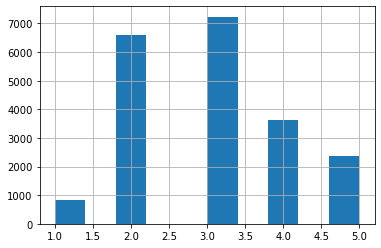

In [94]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

In [95]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

Dont get baffled by complexity of the forumlae - i just coped it from one of the exaples from the documentation which you can see by alt+Tab after the function. <br><br>
Lets see if the percetage ratio is retained in our sample after split

In [96]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [97]:
# Lets remove the income_cat attribute so the data is back to its original state

for x in (strat_train_set, strat_test_set):
    x.drop("income_cat", axis=1, inplace=True)

# sticking to programming style i have just written a loop instead of using .drop twice -
# once for train and once for test

Now that we have split the data we would keep our test set aside and not touch it until we are sure of our model. I will explain the reason why later.<br><br>
let’s separate the predictors and the labels since we don’t necessarily want to apply the same transformations to the predictors and the target values (note that drop() creates a copy of the data and does not affect strat_train_set):

In [98]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## STEP 3 : Prepare the data for ML algorithms
### Part b: Missing value treatment

Most Machine Learning algorithms cannot work with missing features, so let’s create a few functions to take care of them. You noticed earlier that the total_bedrooms attribute has some missing values, so let’s fix this. You have three options: 

1. Get rid of the corresponding districts,by using dropna()
2. Get rid of the whole attribute, by using drop()
3. Set the values to some value (the mean, the median, etc.) using fillna()

If you choose option 3 you should compute the median value on the training set, and use it to fill the missing values in the training set, but also don’t forget to save the median value that you have computed. You will need it later to replace missing values in the test set when you want to evaluate your system.

In [99]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Since the median can only be computed on numerical attributes, we need to create a copy of the data without the text attribute ocean_proximity:

In [100]:
housing_num = housing.drop("ocean_proximity", axis=1)

Now you fit the imputer instance to the training data using the fit() Method:

In [101]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

The imputer has simply computed the median of each attribute and stored the result in its statistics_ instance variable. Only the total_bedrooms attribute had missing values, but we cannot be sure that there won’t be any missing values in new data after the system goes live, so it is safer to apply the imputer to all the numerical attributes:

In [102]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [103]:
# cross check this by
housing_num.median()

longitude             -118.5100
latitude                34.2600
housing_median_age      29.0000
total_rooms           2119.5000
total_bedrooms         433.0000
population            1164.0000
households             408.0000
median_income            3.5409
dtype: float64

Now you can use this “trained” imputer to transform the training set by replacing missing values by the learned medians:

In [104]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

### I know its a little heavy lets go through it again, 
1. Imported the library : <code>from sklearn.impute import SimpleImputer</code>
2. Bring it to life by creating an instance of the function<br><code>imputer = SimpleImputer(strategy="median")</code>
3. Dropped all categorical variables<br><code>housing_num=housing.drop("ocean_proximity", axis=1)</code>
4. we use <code>.fit</code> method on our function instance to estimate all means. So we use the instance (imputer) and then method to estimate(.fit) and pass data as argument. so in summary .fit would allways calcuate (but it doesnt do anything else beyond calculate)<br><code>imputer.fit(housing_num)</code>
5. Now that we have calculated these values we need to put these back in data,so we use .transfrorm method.<br><code>imputer.transform(housing_num)</code>

***
You could have done something much simpler like <code>data.fillna(median)</code>, in most of the cases this suffices, but i just wanted to show you how to use this library. You would use this library once you start chaining your preprocessing steps and put them as one huge block of operation. You can even break up your data into same stratas on income and calculate median for each strata and use <code>.fillna()</code> method on each group.
***

## STEP 3 : Prepare the data for ML algorithms
### Part c: Handling Text and Categorical Attributes

Earlier we left out the categorical attribute ocean_proximity because it is a text attribute so we cannot compute its median. Most Machine Learning algos prefer to work with numbers anyway, so let’s convert these categories from text to numbers. For this, we can use Scikit-Learn’s OrdinalEncoder class.

***
Now again you can use simple <code> data.replace() </code> method but i want you to get used to using these libraries. Later we would start automating all this pre processing steps using just 1 line of code and there you would need these libraries.
***

In [107]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat = housing[["ocean_proximity"]]
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

### We followed the same steps again as we did previously.
1. Imported the library : <code>sklearn.preprocessing import OrdinalEncoder</code>
2. Bring it to life by creating an instance of the function<br><code>ordinal_encoder = OrdinalEncoder()</code>
3. Chose our data - in this case only ocean proximity column<br><code>housing_cat = housing[["ocean_proximity"]]</code>
4. SMALL CHANGE, instead of using <code>.fit()</code> and then <code>.transform()</code>, we used <code>.fit_transform()</code>, this has the effect of doing .fit and then .transform one after the other.

Now if we have .fit_transform method why do we need both sepeartely. Later you would see that sometimes we use .fit to estimate data like mean from train set and use same estimates to transform the test data. So we use .fit on train and .transform only on test data.

In [108]:
# Same as before all the estimates are stored in .categories_
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this representation is that ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases (e.g., for ordered categories such as “bad”, “average”, “good”, “excellent”), but it is obviously not the case for the ocean_proximity column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1). To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category is “INLAND” (and 0 otherwise), and so on. This is called one-hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new
attributes are sometimes called dummy attributes. Scikit-Learn provides a OneHotEn coder class to convert categorical values into one-hot vectors

In [111]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Notice that the output is a SciPy sparse matrix, instead of a NumPy array. This is very useful when you have categorical attributes with thousands of categories. After onehot encoding we get a matrix with thousands of columns, and the matrix is full of zeros except for a single 1 per row. Using up tons of memory mostly to store zeros would be very wasteful, so instead a sparse matrix only stores the location of the non‐zero elements.

## STEP 3 : Prepare the data for ML algorithms
### Part d: Handling outliers
since our data has too many outliers, putting a cap or removing all outliers both would have adverse impact on size of our dataset, we would ignore this step. In next examples we might touch back on this.

## STEP 3 : Prepare the data for ML algorithms
### Part d: Processing the data

#### FEATURE SCALING
***
One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales. This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. Note that scaling the target values is generally not required.


There are two common ways to get all attributes to have the same scale: 
1. min-max scaling and 
2. standardization.


Min-max scaling (many people call this normalization) is quite simple: values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called MinMaxScaler for this. 

Standardization is quite different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation so that the resulting distribution has unit variance. Unlike min-max scaling, standardization does not bound values to a specific range, standardization is much less affected by outliers. For example, suppose a district had a median income equal to 100 (by mistake). Min-max scaling would then crush all the other values from 0–15 down to 0–0.15, whereas standardization would not be much affected. Scikit-Learn provides a transformer called StandardScaler for standardization.

#### TRANSFORMATION PIPELINES
***
As you can see, there are many data transformation steps that need to be executed in the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with such sequences of transformations. Here is a small pipeline for the numerical attributes:


In [113]:
from sklearn.pipeline import Pipeline  #this is library to create a pipeline
from sklearn.preprocessing import StandardScaler # scaling library

num_pipeline = Pipeline([
         ('imputer', SimpleImputer(strategy="median")),
         ('std_scaler', StandardScaler()),
     ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

The Pipeline constructor takes a list of name/estimator pairs defining a sequence of steps. The names can be anything you like. When you call the pipeline’s fit_transform() method, it calls fit_transform() sequentially on
all transformers, passing the output of each call as the parameter to the next call.

So far, we have handled the categorical columns and the numerical columns sepa
rately. It would be more convenient to have a single transformer able to handle all columns, applying the appropriate transformations to each column.

We use ColumnTransformer for this purpose. Let's use it to apply all tranformations to the housing data:


In [116]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)     #to get column names with numerical values
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
             ("num", num_pipeline, num_attribs),
             ("cat", OneHotEncoder(), cat_attribs),
         ])

housing_prepared = full_pipeline.fit_transform(housing)

Here is how this works: first we import the ColumnTransformer class, next we get the list of numerical column names and the list of categorical column names, and we construct a ColumnTransformer. The constructor requires a list of tuples, where each tuple contains a name, a transformer and a list of names of columns that the transformer should be applied to. In this example, we specify that the numerical columns should be transformed using the num_pipeline that we defined earlier, and the categorical columns should be transformed using a OneHotEncoder. Finally, we apply this ColumnTransformer to the housing data: it applies each transformer to the appropriate columns and concatenates the outputs along the second axis (the transformers must return the same number of rows).

## STEP 4 : Select and Train a Model
At last! You framed the problem, you got the data and explored it, you sampled a training set and a test set, and you wrote transformation pipelines to clean up and prepare your data for Machine Learning algorithms automatically. You are now ready to select and train a Machine Learning model.

Let’s first train a Linear Regression model

In [119]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

#### Thats it !! It was just 2 lines of code. Lets see if its working

In [120]:
some_data = housing.iloc[:5]
print(some_data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income ocean_proximity  
17606       710.0       339.0         2.7042       <1H OCEAN  
18632       306.0       113.0         6.4214       <1H OCEAN  
14650       936.0       462.0         2.8621      NEAR OCEAN  
3230       1460.0       353.0         1.8839          INLAND  
3555       4459.0      1463.0         3.0347       <1H OCEAN  


In [121]:
some_labels = housing_labels.iloc[:5]
print(some_labels)

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
Name: median_house_value, dtype: float64


In [122]:
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [212288. 321984. 210752.  61376. 192768.]


In [124]:
 print("Correct Lables:", list(some_labels))

Correct Lables: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [130]:
(some_labels.iloc[0]-lin_reg.predict(some_data_prepared)[0])/some_labels.iloc[0]

0.25928820655966506

It works, although the predictions are not exactly accurate (e.g., the first prediction is off by close to 26%!). Let’s measure this regression model’s RMSE on the whole training set using Scikit-Learn’s mean_squared_error function:

In [131]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

69053.6141579744


Okay, this is better than nothing but clearly not a great score: most districts' median_housing_values range between $120,000 and $265,000, so a typical prediction error of 69,000 is not very satisfying. This is an example of a model underfitting the training data. When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough. The main ways to fix underfitting are to
select a more powerful model or feed it better features.

## Just to give a flavour of power of machine learning i am showing you another algorithm called Decision trees

In [132]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Wait, what!? No error at all? Could this model really be absolutely perfect? Of course, it is much more likely that the model has badly overfit the data. How can you be sure?  As we saw earlier, you don’t want to touch the test set until you are ready to launch a  model you are confident about, so you need to use part of the training set for training, and part for model validation.

# END OF NOTEBOOK 
### WE WILL SEE HOW TO CHECK THE MODEL ON TRAIN DATA IN NEXT SESSION